# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [204]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [205]:
import numpy as np
import math
from scipy import optimize
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [206]:
#The parameters are defined
m=1
t0=0.4
t1=0.1
k=0.4
w=1
epsilon=0.3
v=10
l = range(0,1)

#The utily function is defined
def ufunc(l,x,v=10,epsilon=0.3):
    return np.log(x)-v*((l**(1+1/epsilon))/(1+1/epsilon))

#Defining a function to minimize and including the constraint
def value_of_choice(l,x,m,w,t0,t1,k,v,epsilon):
    x = m + w*l-(t0*w*l + t1*max(w*l-k,0))
    return -ufunc(l,x,v,epsilon)

#The negative utility function is minimized and thereby the utility function is maximized
sol_case1 = optimize.minimize_scalar(
    value_of_choice,l,method='bounded',
    bounds=(0,1),args=(l,m,w,t0,t1,k,v,epsilon))

#The solution is unpacked
l = sol_case1.x
x = m + w*l-(t0*w*l + t1*max(w*l-k,0))
u = ufunc(l,x,v=10,epsilon=0.3)

print(f'Optimal labour supply: {l:.1f}')
print(f'Optimal consumption: {x:.2f}')
print(f'Utility: {u:.2f}')

Optimal labour supply: 0.4
Optimal consumption: 1.24
Utility: 0.17


# Question 2

ADD ANSWER.

<function matplotlib.pyplot.show(*args, **kw)>

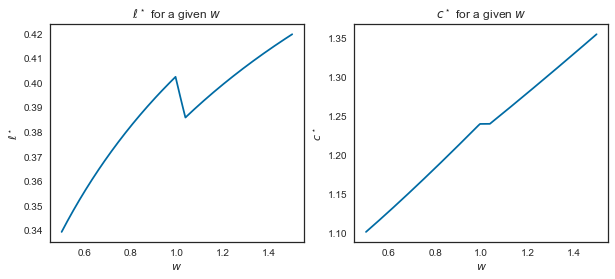

In [207]:
N=10000

#The interval for w is chosen and empty arrays are made for the variables
w_values = np.linspace(0.5,1.5,N)
l_values = np.empty(N)
x_values = np.empty(N)

#The constraint is defined
def constraint(l,w):
    cons = m + w*l-(t0*w*l + t1*max(w*l-k,0))
    return cons

#A loop is created to generate results for the values of l and x
for i,w in enumerate(w_values):
    result = optimize.minimize_scalar(value_of_choice,bounds=(0,1),args=(l,m,w,t0,t1,k,v,epsilon),method="bounded")
    l_values[i] = result.x
    x_values[i] = constraint(l_values[i],w)

plt.style.use('seaborn-white')
fig = plt.figure(figsize=(10,4))

#l^star as a function of w is plotted
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_values,l_values)


ax_left.set_title('$\ell^\star$ for a given $w$')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$\ell^\star$')

#c^star as a function of w is plotted
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_values,x_values)


ax_right.set_title('$c^\star$ for a given $w$')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')

plt.show

# Question 3

ADD ANSWER.

In [208]:
#The tax revenued is defined as the sum of revenues from each individual, N
def tax(w_values,l_values,t0,t1,k):
    revenue = np.sum(t0*w_values*l_values + t1*np.max(w_values*l_values-k,0))
    return revenue

print(f'Total tax revenue: {tax(w_values,l_values,t0,t1,k):.1f} currency units')

Total tax revenue: 1807.1 currency units


# Question 4

ADD ANSWER.

In [209]:
#The new value of elasticity is defined
epsilon2=0.1

#The process from previous questions is repeated
for i,w in enumerate(w_values):
    result = optimize.minimize_scalar(value_of_choice,bounds=(0,1),args=(l,m,w,t0,t1,k,v,epsilon2),method="bounded")
    l_values[i] = result.x
    x_values[i] = constraint(l_values[i],w)

def tax(w_values,l_values,t0,t1,k):
    revenue = np.sum(t0*w_values*l_values + t1*np.max(w_values*l_values-k,0))
    return revenue

print(f'Total tax revenue for epsilon = 0.1: {tax(w_values,l_values,t0,t1,k):.1f} currency units')

Total tax revenue for epsilon = 0.1: 3581.0 currency units


# Question 5

ADD ANSWER.

In [248]:
#The variables are defined as a vector and the revenue in respect to these is constructed
def revenue(x):
    t0 = x[0]
    t1 = x[1]
    k = x[2]
    w = x[3]
    l = x[4]
    rev = np.sum(t0*w*l + t1*np.max(w*l-k,0))
    return rev

#The budget constraint is constructed from the vector
def budget_constraint(x):
    t0 = x[0]
    t1 = x[1]
    k = x[2]
    cons = m + x[3]*x[4] - (x[0]*x[3]*x[4] + x[1]*np.max(x[3]*x[4]-x[2],0))
    return cons

#The optimal tax revenue is defined based on the budget constraint and and the previously defined revenue
def _tax(x):
    w = x[3]
    l = x[4]
    c = budget_constraint(x)
    return -revenue(x)

#Bounds are created and an inital guess based on our given values in question 2 is given
inital_guess = [0.4, 0.1, 0.4, 1, 0.4]
bounds = ((0,1),(0,1),(0,1),(0.5,1.5),(0,1))
constraint = ({"type":"ineq","fun":budget_constraint})

result = optimize.minimize(_tax, inital_guess, bounds=bounds,constraints=constraint, method='SLSQP')

#The solution is unpacked
t0_s = result.x[0]
t1_s = result.x[1]
k_s = result.x[2]
w_s = result.x[3]
l_s = result.x[4]
c_s = budget_constraint(tax_res.x)
ufunc_s = ufunc(c_s,l_s)
tax_s = tax(w_values,l_values,t0_s,t1_s,k_s)

print(f'Standard labour income tax: {t0_s*100:.1f}%')
print(f'Top bracket labour income tax: {t1_s*100:.1f}%')
print(f'Cut-off for top labour income: {k_s:.1f}')
print(f'Expected tax revenue: {tax_s:.1f} currency units')

Standard labor income tax: 99.9%
Top bracket labor income tax: 66.8%
Cut-off for top labor income: 0.0
Expected tax revenue: 14557.2 currency units


# Conclusion

ADD CONCISE CONCLUSION.

From our results we can conclude that higher wages generally result in greater labour supply and consumption.
It can be observed from the figures how the labour supply drops for a wage equal to 1, which can be considered to be somewhat implausible.
It is found that the tax revenue for the given parameters is equal to 1807.1, whereas the tax revenue with epsilon = 0.1 is around double that amount; 3581. Based on our initial guesses we advise the politician to choose a standard labour income tax of 99,9% (which may also be considered to be quite unlikely) and a top bracket labour income tax of 66,8%. From this the politician would gain a tax revenue of 14557,2 currency units.